In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv("../data/housing.data", header=None, sep="\s+")
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [6]:
X = df.iloc[:,:-1].values # MEDV를 제외한
Y = df['MEDV'].values

train_test_split(arrays, test_size, train_size, random_state, shuffle, stratify)

(1) Parameter

arrays : 분할시킬 데이터를 입력 (Python list, Numpy array, Pandas dataframe 등..)

test_size : 테스트 데이터셋의 비율(float)이나 갯수(int) (default = 0.25)

train_size : 학습 데이터셋의 비율(float)이나 갯수(int) (default = test_size의 나머지)

random_state : 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값 (int나 RandomState로 입력)

shuffle : 셔플여부설정 (default = True)

stratify : 지정한 Data의 비율을 유지한다. 예를 들어, Label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때, stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다.

​

(2) Return

X_train, X_test, Y_train, Y_test : arrays에 데이터와 레이블을 둘 다 넣었을 경우의 반환이며, 데이터와 레이블의 순서쌍은 유지된다.

X_train, X_test : arrays에 레이블 없이 데이터만 넣었을 경우의 반환
[출처] [Python] sklearn의 train_test_split() 사용법|작성자 Paris Lee

In [7]:
train_data, test_data, tarin_label, test_label =  train_test_split(X, Y, test_size=0.3, random_state=321)

In [8]:
train_data.shape, tarin_label.shape, test_data.shape, test_label.shape

((354, 13), (354,), (152, 13), (152,))

## Linear Model

In [9]:
model = LinearRegression()
model.fit(train_data, tarin_label)

LinearRegression()

In [10]:
train_pred = model.predict(train_data)
test_pred = model.predict(test_data)

C:\Users\ynebu\Anaconda3\envs\test\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ynebu\Anaconda3\envs\test\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


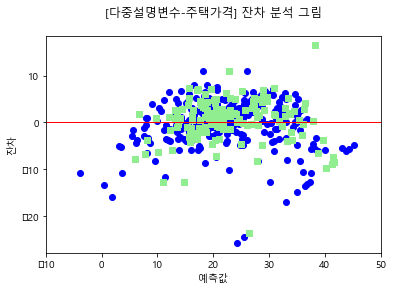

In [11]:
plt.rc('font', family='Malgun Gothic') #한글 폰트 설정
plt.scatter(train_pred, train_pred-tarin_label, c='blue', marker='o', label='트레이닝 데이터')
plt.scatter(test_pred, test_pred-test_label, c='lightgreen', marker='s', label='테스트 데이터')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='r', linewidth=1) # 가로선 긋기
plt.xlim([-10, 50])
plt.title('[다중설명변수-주택가격] 잔차 분석 그림\n')
plt.xlabel('예측값')
plt.ylabel('잔차')
plt.show()

## MSE and R^2(결정계수)

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [13]:
mse_train = mean_squared_error(tarin_label, train_pred)
mse_test = mean_squared_error(test_label, test_pred)

r2_score_train = r2_score(tarin_label, train_pred)
r2_score_test = r2_score(test_label, test_pred)

In [14]:
print('MSE - 트레이닝 데이터: %.2f, 테스트 데이터: %.2f' %(mse_train, mse_test))
print('R2 - 트레이닝 데이터: %.2f, 테스트 데이터: %.2f' %(r2_score_train, r2_score_test))

MSE - 트레이닝 데이터: 22.33, 테스트 데이터: 21.55
R2 - 트레이닝 데이터: 0.74, 테스트 데이터: 0.73


## 정규화 - Normalization
- 리지회귀
- 라쏘
- Elastic Net

In [15]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

## Normal Model

In [17]:
norm_model = Ridge(alpha=1.0)
#norm_model = Lasso(alpha=1.0)
#norm_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
norm_model.fit(train_data, tarin_label)

Ridge()

In [18]:
norm_train_pred = model.predict(train_data)
norm_test_pred = model.predict(test_data)

C:\Users\ynebu\Anaconda3\envs\test\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ynebu\Anaconda3\envs\test\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


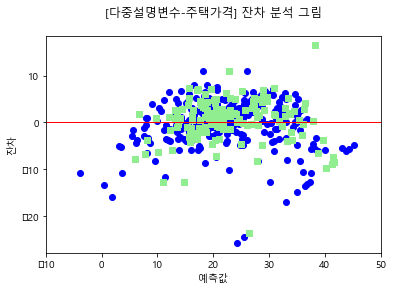

In [19]:
plt.rc('font', family='Malgun Gothic') #한글 폰트 설정
plt.scatter(norm_train_pred, norm_train_pred-tarin_label, c='blue', marker='o', label='트레이닝 데이터')
plt.scatter(norm_test_pred, norm_test_pred-test_label, c='lightgreen', marker='s', label='테스트 데이터')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='r', linewidth=1) # 가로선 긋기
plt.xlim([-10, 50])
plt.title('[다중설명변수-주택가격] 잔차 분석 그림\n')
plt.xlabel('예측값')
plt.ylabel('잔차')
plt.show()

In [20]:
norm_mse_train = mean_squared_error(tarin_label, norm_train_pred)
norm_mse_test = mean_squared_error(test_label, norm_test_pred)

norm_r2_score_train = r2_score(tarin_label, norm_train_pred)
norm_r2_score_test = r2_score(test_label, norm_test_pred)

In [21]:
print('MSE - 트레이닝 데이터: %.2f, 테스트 데이터: %.2f' %(norm_mse_train, norm_mse_test))
print('R2 - 트레이닝 데이터: %.2f, 테스트 데이터: %.2f' %(norm_r2_score_train, norm_r2_score_test))

MSE - 트레이닝 데이터: 22.33, 테스트 데이터: 21.55
R2 - 트레이닝 데이터: 0.74, 테스트 데이터: 0.73
